In [114]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

with open("housedata\data.dat") as json_file:
    json_data = json.load(json_file)
    houses = pd.DataFrame(json_data)

In [115]:
df = json_normalize(json_data['houses'])

In [116]:
df['date'].value_counts()

20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20140709T000000    121
20140624T000000    120
20140520T000000    116
20140701T000000    115
20140617T000000    113
20140528T000000    111
20140620T000000    107
20140527T000000    104
20140603T000000    104
20140619T000000    101
20140604T000000    100
20140618T000000     99
20140610T000000     98
20140616T000000     97
20140609T000000     95
20140521T000000     94
20140605T000000     93
20140507T000000     93
20140627T000000     92
20140522T000000     91
20140702T000000     90
20140611T000000     90
20140612T000000     90
20140513T000000     86
20140523T000000     84
20140505T000000     84
                  ... 
20140703T000000     74
20140516T000000     73
20140606T000000     67
20140502T000000     67
20140530T000000     65
20140710T000000     31
20140628T000000     13
20140622T000000     12
20140524T000000     11
20140608T000000     10
20140526T000000      8
20140621T000000      8
20140614T00

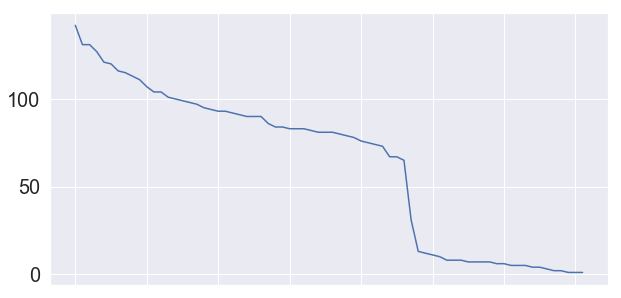

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
df['date'].value_counts().plot(kind = 'line',figsize = (10,5))
plt.show()

In [118]:
# replacing different time format
df['date'].replace(['23052014T000000'],['20140523T000000'], inplace = True)
df['date'].replace(['20140631T000000'],['20140701T000000'],inplace = True)

In [119]:
df.head()

,address,area.sqft_above,area.sqft_basement,area.sqft_living/sqft_lot,condition,date,floors,price,rooms,view,waterfront,yr_built,yr_renovated
0,"18810 Densmore Ave N, Shoreline, WA 98133, USA",1340,0,sqft_living/sqft_lot=1340\ 7912,3,20140502T000000,1.5,313000.0,Number of bathrooms: 1.5; Number of bedrooms: 3,0,0,1955,NaN
1,"709 W Blaine St, Seattle, WA 98119, USA",3370,280,sqft_living/sqft_lot=3650\ 9050,5,20140502T000000,2.0,2384000.0,Number of bathrooms: 2.5; Number of bedrooms: 5,4,0,1921,NaN
2,"26206-26214 143rd Ave SE, Kent, WA 98042, USA",1930,0,sqft_living/sqft_lot=1930\ 11947,4,20140502T000000,1.0,342000.0,Number of bathrooms: 2.0; Number of bedrooms: 3,0,0,1966,NaN
3,"857 170th Pl NE, Bellevue, WA 98008, USA",1000,1000,sqft_living/sqft_lot=2000\ 8030,4,20140502T000000,1.0,420000.0,Number of bathrooms: 2.25; Number of bedrooms: 3,0,0,1963,NaN
4,"9105 170th Ave NE, Redmond, WA 98052, USA",1140,800,sqft_living/sqft_lot=1940\ 10500,4,20140502T000000,1.0,550000.0,Number of bedrooms: 4; Number of bathrooms: 2.5,0,0,1976,NaN


In [120]:
df['address_list'] = df['address'].str.split(',')
df['street'] =df['address_list'].apply(lambda col:col[0])
df['city'] = df['address_list'].apply(lambda col : col[1])
df['state'] = df['address_list'].apply(lambda col : col[2])
df['country'] = df['address_list'].apply(lambda col : col[3])

In [121]:
df.drop(columns='address',inplace = True)
df.drop(columns ='address_list', inplace = True)

In [122]:
df['bathrooms'] = df['rooms'].str.extract('Number of bathrooms: (\d.\d+)', expand = True)
df['bedrooms'] = df['rooms'].str.extract('Number of bedrooms: (\d+)', expand = True)

In [123]:
df.drop('rooms', axis = 1, inplace = True)

In [124]:
df['area.sqft_living/sqft_lot_list'] = df['area.sqft_living/sqft_lot'].str.split('=')
df['s1'] = df['area.sqft_living/sqft_lot_list'].apply(lambda col: col[0])
df['s2'] = df['area.sqft_living/sqft_lot_list'].apply(lambda col: col[1])

In [125]:
df.drop(['area.sqft_living/sqft_lot_list','area.sqft_living/sqft_lot','s1'],axis = 1,inplace =True)

In [126]:
df['l'] = df['s2'].str.split('\ ')
df['sqft_living'] = df['l'].apply(lambda col : col[0])
df['sqft_lot'] = df['l'].apply(lambda col : col[1])

In [127]:
df.drop(['s2','l'],axis = 1, inplace = True)

In [128]:
# to remove last character'\' from sqft_living
df['sqft_living'] = df['sqft_living'].str.rstrip('\ ')

In [129]:
# coverting the date column in datetime format
df['date'] = pd.to_datetime(df['date'])

In [130]:
# changing the datetime format
df['date'] = df['date'].dt.strftime('%Y-%m-%dT%H:%m:%s')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 18 columns):
area.sqft_above       4601 non-null int64
area.sqft_basement    4601 non-null int64
condition             4601 non-null int64
date                  4601 non-null object
floors                4601 non-null float64
price                 4601 non-null float64
view                  4601 non-null int64
waterfront            4601 non-null int64
yr_built              4601 non-null int64
yr_renovated          229 non-null float64
street                4601 non-null object
city                  4601 non-null object
state                 4601 non-null object
country               4601 non-null object
bathrooms             4601 non-null object
bedrooms              4601 non-null object
sqft_living           4601 non-null object
sqft_lot              4601 non-null object
dtypes: float64(3), int64(6), object(9)
memory usage: 647.1+ KB


In [132]:
df[['sqft_living','sqft_lot']] = df[['sqft_living','sqft_lot']].astype(np.int64)
df[['bathrooms','bedrooms']] = df[['bathrooms','bedrooms']].astype(float)
df['price']= df['price'].astype(np.int64)

# cleansing the data

In [133]:
df.describe(include='all')

,area.sqft_above,area.sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,street,city,state,country,bathrooms,bedrooms,sqft_living,sqft_lot
count,4601.000000,4601.000000,4601.000000,4601,4601.000000,4.601000e+03,4601.000000,4601.000000,4601.000000,229.000000,4601,4601,4601,4601,4601.000000,4601.000000,4601.000000,4.601000e+03
unique,NaN,NaN,NaN,70,NaN,NaN,NaN,NaN,NaN,NaN,4525,62,77,1,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,4,1569,148,4601,NaN,NaN,NaN,NaN
mean,1827.448598,312.013693,3.451641,NaN,1.512171,5.345240e+05,0.240600,0.007172,1970.790263,1995.707424,NaN,NaN,NaN,NaN,2.160763,3.400782,2139.218865,1.485157e+04
std,862.164780,464.109581,0.677189,NaN,0.538278,5.716016e+05,0.778328,0.084395,29.729829,18.590155,NaN,NaN,NaN,NaN,0.783810,0.908769,963.087096,3.588059e+04
min,370.000000,0.000000,1.000000,NaN,1.000000,0.000000e+00,0.000000,0.000000,1900.000000,1912.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,370.000000,6.380000e+02
25%,1190.000000,0.000000,3.000000,NaN,1.000000,3.099500e+05,0.000000,0.000000,1951.000000,1988.000000,NaN,NaN,NaN,NaN,1.750000,3.000000,1460.000000,5.001000e+03
50%,1590.000000,0.000000,3.000000,NaN,1.500000,4.535000e+05,0.000000,0.000000,1976.000000,2001.000000,NaN,NaN,NaN,NaN,2.250000,3.000000,1980.000000,7.683000e+03
75%,2300.000000,610.000000,4.000000,NaN,2.000000,6.500000e+05,0.000000,0.000000,1997.000000,2009.000000,NaN,NaN,NaN,NaN,2.500000,4.000000,2620.000000,1.100000e+04


In [134]:
df.isnull().sum()

area.sqft_above          0
area.sqft_basement       0
condition                0
date                     0
floors                   0
price                    0
view                     0
waterfront               0
yr_built                 0
yr_renovated          4372
street                   0
city                     0
state                    0
country                  0
bathrooms                0
bedrooms                 0
sqft_living              0
sqft_lot                 0
dtype: int64

# lexical errors

In [135]:
df['city'].value_counts()

 Seattle                1569
 Renton                  293
 Bellevue                284
 Redmond                 232
 Issaquah                186
 Kirkland                186
 Kent                    185
 Auburn                  174
 Sammamish               174
 Federal Way             148
 Shoreline               122
 Woodinville             113
 Maple Valley             96
 Mercer Island            86
 Burien                   74
 Snoqualmie               70
 Kenmore                  66
 Des Moines               58
 North Bend               50
 Covington                43
 Duvall                   42
 Lake Forest Park         36
 Bothell                  33
 Newcastle                33
 Vashon                   29
 Tukwila                  29
 SeaTac                   29
 Enumclaw                 28
 Carnation                21
 Normandy Park            18
                        ... 
 Medina                   11
 Black Diamond             9
 Ravensdale                7
 Pacific      

In [136]:
df['city'].replace(['Redmonde'],['Redmond'],inplace=True)

In [137]:
df['city'].value_counts()

 Seattle                1569
 Renton                  293
 Bellevue                284
 Redmond                 232
 Issaquah                186
 Kirkland                186
 Kent                    185
 Auburn                  174
 Sammamish               174
 Federal Way             148
 Shoreline               122
 Woodinville             113
 Maple Valley             96
 Mercer Island            86
 Burien                   74
 Snoqualmie               70
 Kenmore                  66
 Des Moines               58
 North Bend               50
 Covington                43
 Duvall                   42
 Lake Forest Park         36
 Bothell                  33
 Newcastle                33
 Vashon                   29
 Tukwila                  29
 SeaTac                   29
 Enumclaw                 28
 Carnation                21
 Normandy Park            18
                        ... 
 Medina                   11
 Black Diamond             9
 Ravensdale                7
 Pacific      

In [138]:
df['city'].replace(['sammamish'],['Sammamish'],inplace=True) 

# there is a Lexical error in city "Samamish" which is replaced with the average value of city named "Sammamish"
df['city'].replace(['Samamish'],['Sammamish'],inplace=True) 

# there is a Lexical error in city "Seaattle" which is replaced with the average value of city named "Seattle"
df['city'].replace(['Seaattle'],['Seattle'],inplace=True) 

# there is a Lexical error in city "Seatle" which is replaced with the average value of city named "Seattle"
df['city'].replace(['Seatle'],['Seattle'],inplace=True) 
 
# there is a Lexical error in city "seattle" which is replaced with the average value of city named "Seattle"
df['city'].replace(['seattle'],['Seattle'],inplace=True)

# there is a Lexical error in city "Issaguah" which is replaced with the average value of city named "Issaquah"
df['city'].replace(['Issaguah'],['Issaquah'],inplace=True)

# there is a Lexical error in city "Woodenville" which is replaced with the average value of city named "Woodinville"
df['city'].replace(['Woodenville'],['Woodinville'],inplace=True)
 
# there is a Lexical error in city "redmond" which is replaced with the average value of city named "Redmond"
df['city'].replace(['redmond'],['Redmond'],inplace=True)

# there is a Lexical error in city "Redmund" which is replaced w
df['city'].replace(['Redmund'],['Redmond'],inplace=True)

# there is a Lexical error in city "Redmund" which is replaced with the average value of city named "Redmond"
df['city'].replace(['Redmonde'],['Redmond'],inplace=True)

# there is a Lexical error in city "auburn" which is replaced with the average value of city named "Auburn"
df['city'].replace(['auburn'],['Auburn'],inplace=True)

# there is a Lexical error in city "Auburnt" which is replaced with the average value of city named "Auburn"
df['city'].replace(['Auburnt'],['Auburn'],inplace=True)

df['city'].replace(['Sureline'],['Shoreline'],inplace=True)

# there is a Lexical error in city "Bellvue" which is replaced with the average value of city named "Bellevue "
df['city'].replace(['Bellvue'],['Bellevue'],inplace=True)

# there is a Lexical error in city "Belleview" which is replaced with the average value of city named "Bellevue "
df['city'].replace(['Belleview'],['Bellevue'],inplace=True)

# there is a Lexical error in city "Snogualmie" which is replaced with the average value of city named "Snoqualmie"
df['city'].replace(['Snogualmie'],['Snoqualmie'],inplace=True)

# there is a Lexical error in city "Coronation" which is replaced with the average value of city named "Carnation"
df['city'].replace(['Coronation'],['Carnation'],inplace=True)

# there is a Lexical error in city "Kirklund" which is replaced with the average value of city named "Kirkland"
df['city'].replace(['Kirklund'],['Kirkland'],inplace=True)


In [139]:
df['bathrooms'].value_counts()

2.50    1189
1.00     743
1.75     628
2.00     427
2.25     418
1.50     290
2.75     275
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
0.00       2
6.25       2
8.00       1
1.70       1
6.50       1
1.05       1
2.55       1
2.30       1
5.75       1
6.75       1
2.57       1
Name: bathrooms, dtype: int64

In [140]:
df['bathrooms'].replace([1.70],[1.75],inplace =True)
df['bathrooms'].replace([1.05],[1.25],inplace =True)
df['bathrooms'].replace([2.55],[2.50],inplace =True)
df['bathrooms'].replace([2.57],[2.50],inplace =True)
df['bathrooms'].replace([2.30],[2.25],inplace =True)

# dealing with duplicates

In [141]:
df[df.duplicated(keep = False)]

,area.sqft_above,area.sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,street,city,state,country,bathrooms,bedrooms,sqft_living,sqft_lot
4336,2670,0,3,2014-05-22 00:00:00,2.0,657500,0,0,1989,NaN,1917 235th Ct NE,Sammamish,WA 98074,USA,2.5,3.0,2670,10496
4337,2670,0,3,2014-05-22 00:00:00,2.0,657500,0,0,1989,NaN,1917 235th Ct NE,Sammamish,WA 98074,USA,2.5,3.0,2670,10496


In [142]:
# only above two rows are duplicated
df.drop_duplicates(keep = 'first', inplace = True)

# Treating missing values

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4600 entries, 0 to 4600
Data columns (total 18 columns):
area.sqft_above       4600 non-null int64
area.sqft_basement    4600 non-null int64
condition             4600 non-null int64
date                  4600 non-null object
floors                4600 non-null float64
price                 4600 non-null int64
view                  4600 non-null int64
waterfront            4600 non-null int64
yr_built              4600 non-null int64
yr_renovated          229 non-null float64
street                4600 non-null object
city                  4600 non-null object
state                 4600 non-null object
country               4600 non-null object
bathrooms             4600 non-null float64
bedrooms              4600 non-null float64
sqft_living           4600 non-null int64
sqft_lot              4600 non-null int64
dtypes: float64(4), int64(9), object(5)
memory usage: 682.8+ KB


In [144]:
df.isnull().sum()

area.sqft_above          0
area.sqft_basement       0
condition                0
date                     0
floors                   0
price                    0
view                     0
waterfront               0
yr_built                 0
yr_renovated          4371
street                   0
city                     0
state                    0
country                  0
bathrooms                0
bedrooms                 0
sqft_living              0
sqft_lot                 0
dtype: int64

In [145]:
df['yr_renovated'].unique()

array([  nan, 1994., 1954., 2011., 1998., 1958., 1992., 2005., 1986.,
       2013., 2014., 2002., 2001., 1990., 1956., 1984., 2003., 2010.,
       2000., 1996., 2007., 1970., 1983., 1981., 1971., 1988., 1999.,
       2009., 1995., 1969., 1997., 1989., 1982., 2006., 1985., 1993.,
       1953., 1955., 1979., 1987., 1960., 1934., 1945., 2008., 1980.,
       2012., 1972., 1948., 1978., 2004., 1968., 1991., 1974., 1913.,
       1912., 1923., 1977., 1975.])

In [146]:
# plotting box plot for yr_renovated, if there are too many outliers , we can go for median id not we go for mean
import matplotlib.pyplot as plt
%matplotlib inline

bp = df['yr_renovated'].dropna()

In [147]:
df1 = pd.DataFrame(bp)

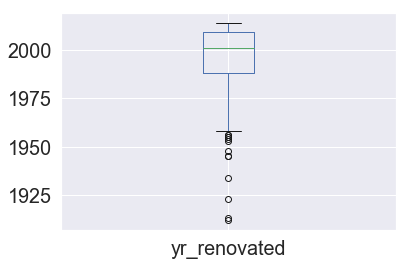

In [148]:
df1.boxplot()

# from above fig, we can see that there are too many outliers, so we go for median

In [149]:
# replacing null value with mean
df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_renovated'].median())

In [150]:
df.head()

,area.sqft_above,area.sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,street,city,state,country,bathrooms,bedrooms,sqft_living,sqft_lot
0,1340,0,3,2014-05-02 00:00:00,1.5,313000,0,0,1955,2001.0,18810 Densmore Ave N,Shoreline,WA 98133,USA,1.50,3.0,1340,7912
1,3370,280,5,2014-05-02 00:00:00,2.0,2384000,4,0,1921,2001.0,709 W Blaine St,Seattle,WA 98119,USA,2.50,5.0,3650,9050
2,1930,0,4,2014-05-02 00:00:00,1.0,342000,0,0,1966,2001.0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2.00,3.0,1930,11947
3,1000,1000,4,2014-05-02 00:00:00,1.0,420000,0,0,1963,2001.0,857 170th Pl NE,Bellevue,WA 98008,USA,2.25,3.0,2000,8030
4,1140,800,4,2014-05-02 00:00:00,1.0,550000,0,0,1976,2001.0,9105 170th Ave NE,Redmond,WA 98052,USA,2.50,4.0,1940,10500


In [151]:
df['yr_renovated'] = df['yr_renovated'].astype(np.int64)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4600 entries, 0 to 4600
Data columns (total 18 columns):
area.sqft_above       4600 non-null int64
area.sqft_basement    4600 non-null int64
condition             4600 non-null int64
date                  4600 non-null object
floors                4600 non-null float64
price                 4600 non-null int64
view                  4600 non-null int64
waterfront            4600 non-null int64
yr_built              4600 non-null int64
yr_renovated          4600 non-null int64
street                4600 non-null object
city                  4600 non-null object
state                 4600 non-null object
country               4600 non-null object
bathrooms             4600 non-null float64
bedrooms              4600 non-null float64
sqft_living           4600 non-null int64
sqft_lot              4600 non-null int64
dtypes: float64(3), int64(10), object(5)
memory usage: 682.8+ KB


In [153]:
# detecting 0's in price
df['price'].value_counts()

0          248
300000      40
400000      31
450000      29
440000      29
600000      29
350000      28
550000      27
415000      27
250000      27
435000      26
475000      26
525000      26
530000      26
330000      24
500000      24
425000      23
235000      23
345000      23
385000      23
320000      22
325000      22
405000      22
560000      21
650000      21
375000      21
410000      21
285000      20
280000      20
575000      19
          ... 
322200       1
691500       1
323000       1
216500       1
259500       1
921000       1
1990000      1
531500       1
326100       1
441750       1
472500       1
789900       1
3710000      1
548800       1
389800       1
347500       1
635200       1
792000       1
3100000      1
527700       1
1005000      1
597326       1
413000       1
154950       1
306500       1
744500       1
1510000      1
798000       1
539950       1
593000       1
Name: price, Length: 1591, dtype: int64

In [154]:
# 248 0's in the y variable
df['price'] = df['price'].replace(0,np.nan)

In [155]:
df['price'].value_counts()

300000.0     40
400000.0     31
450000.0     29
440000.0     29
600000.0     29
350000.0     28
415000.0     27
250000.0     27
550000.0     27
475000.0     26
435000.0     26
525000.0     26
530000.0     26
500000.0     24
330000.0     24
345000.0     23
235000.0     23
425000.0     23
385000.0     23
405000.0     22
320000.0     22
325000.0     22
650000.0     21
375000.0     21
560000.0     21
410000.0     21
280000.0     20
285000.0     20
430000.0     19
210000.0     19
             ..
256883.0      1
2250000.0     1
743000.0      1
120000.0      1
187000.0      1
337500.0      1
1049000.0     1
1405000.0     1
421000.0      1
388000.0      1
743700.0      1
1105000.0     1
498800.0      1
334990.0      1
244615.0      1
396450.0      1
798000.0      1
355500.0      1
304900.0      1
1635000.0     1
667500.0      1
1003000.0     1
481015.0      1
683500.0      1
577000.0      1
489200.0      1
756000.0      1
1950000.0     1
240500.0      1
256000.0      1
Name: price, Length: 159

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4600 entries, 0 to 4600
Data columns (total 18 columns):
area.sqft_above       4600 non-null int64
area.sqft_basement    4600 non-null int64
condition             4600 non-null int64
date                  4600 non-null object
floors                4600 non-null float64
price                 4352 non-null float64
view                  4600 non-null int64
waterfront            4600 non-null int64
yr_built              4600 non-null int64
yr_renovated          4600 non-null int64
street                4600 non-null object
city                  4600 non-null object
state                 4600 non-null object
country               4600 non-null object
bathrooms             4600 non-null float64
bedrooms              4600 non-null float64
sqft_living           4600 non-null int64
sqft_lot              4600 non-null int64
dtypes: float64(4), int64(9), object(5)
memory usage: 682.8+ KB


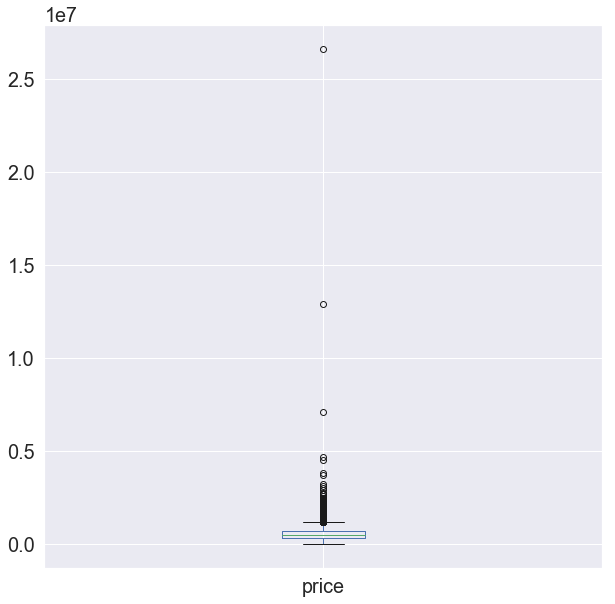

In [157]:
df.boxplot(column = 'price', figsize = (10,10))

In [158]:
df['price'].unique()

array([3.130e+05, 2.384e+06, 3.420e+05, ..., 2.659e+07, 7.800e+03,
             nan])

In [159]:
# replacing null values
df['price'].fillna(df['price'].median(),inplace=True)

In [160]:
df.price.describe()

count    4.600000e+03
mean     5.598903e+05
std      5.576405e+05
min      7.800000e+03
25%      3.399975e+05
50%      4.710000e+05
75%      6.500000e+05
max      2.659000e+07
Name: price, dtype: float64

detecting outliers

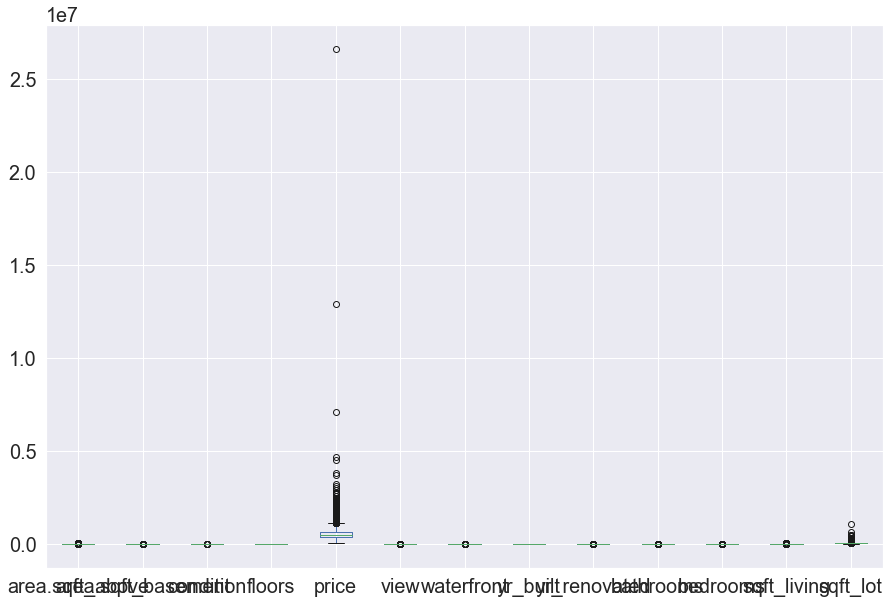

In [161]:
df.boxplot(figsize = (15,10))

In [162]:
df.head()

,area.sqft_above,area.sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,street,city,state,country,bathrooms,bedrooms,sqft_living,sqft_lot
0,1340,0,3,2014-05-02 00:00:00,1.5,313000.0,0,0,1955,2001,18810 Densmore Ave N,Shoreline,WA 98133,USA,1.50,3.0,1340,7912
1,3370,280,5,2014-05-02 00:00:00,2.0,2384000.0,4,0,1921,2001,709 W Blaine St,Seattle,WA 98119,USA,2.50,5.0,3650,9050
2,1930,0,4,2014-05-02 00:00:00,1.0,342000.0,0,0,1966,2001,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2.00,3.0,1930,11947
3,1000,1000,4,2014-05-02 00:00:00,1.0,420000.0,0,0,1963,2001,857 170th Pl NE,Bellevue,WA 98008,USA,2.25,3.0,2000,8030
4,1140,800,4,2014-05-02 00:00:00,1.0,550000.0,0,0,1976,2001,9105 170th Ave NE,Redmond,WA 98052,USA,2.50,4.0,1940,10500


In [163]:
df.describe()

,area.sqft_above,area.sqft_basement,condition,floors,price,view,waterfront,yr_built,yr_renovated,bathrooms,bedrooms,sqft_living,sqft_lot
count,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03
mean,1827.265435,312.081522,3.451739,1.512065,5.598903e+05,0.240652,0.007174,1970.786304,2000.736522,2.160707,3.400870,2139.103478,1.485252e+04
std,862.168977,464.137228,0.677230,0.538288,5.576405e+05,0.778405,0.084404,29.731848,4.296336,0.783803,0.908848,963.159990,3.588444e+04
min,370.000000,0.000000,1.000000,1.000000,7.800000e+03,0.000000,0.000000,1900.000000,1912.000000,0.000000,0.000000,370.000000,6.380000e+02
25%,1190.000000,0.000000,3.000000,1.000000,3.399975e+05,0.000000,0.000000,1951.000000,2001.000000,1.750000,3.000000,1460.000000,5.000750e+03
50%,1590.000000,0.000000,3.000000,1.500000,4.710000e+05,0.000000,0.000000,1976.000000,2001.000000,2.250000,3.000000,1980.000000,7.683000e+03
75%,2300.000000,610.000000,4.000000,2.000000,6.500000e+05,0.000000,0.000000,1997.000000,2001.000000,2.500000,4.000000,2620.000000,1.100125e+04
max,9410.000000,4820.000000,5.000000,3.500000,2.659000e+07,4.000000,1.000000,2014.000000,2014.000000,8.000000,9.000000,13540.000000,1.074218e+06


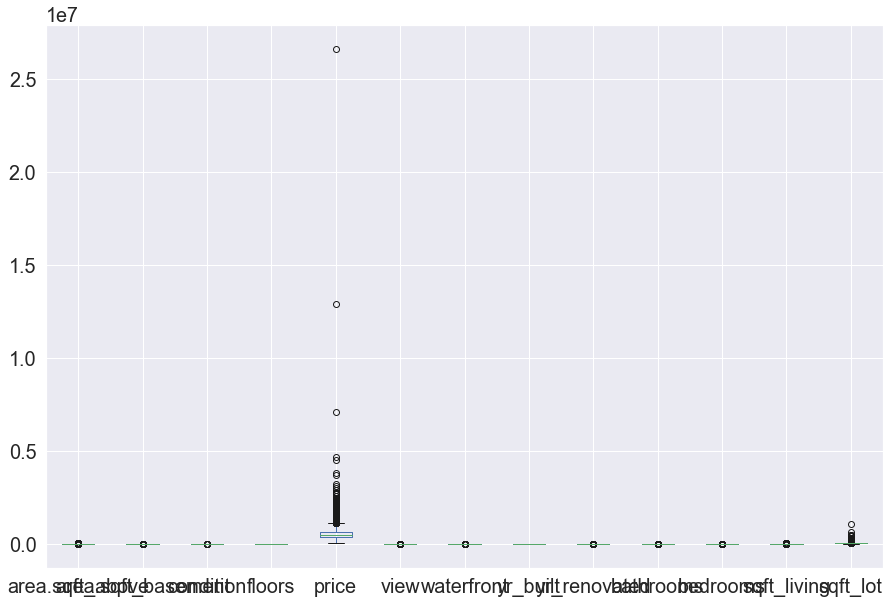

In [164]:
df.boxplot(figsize = (15,10))

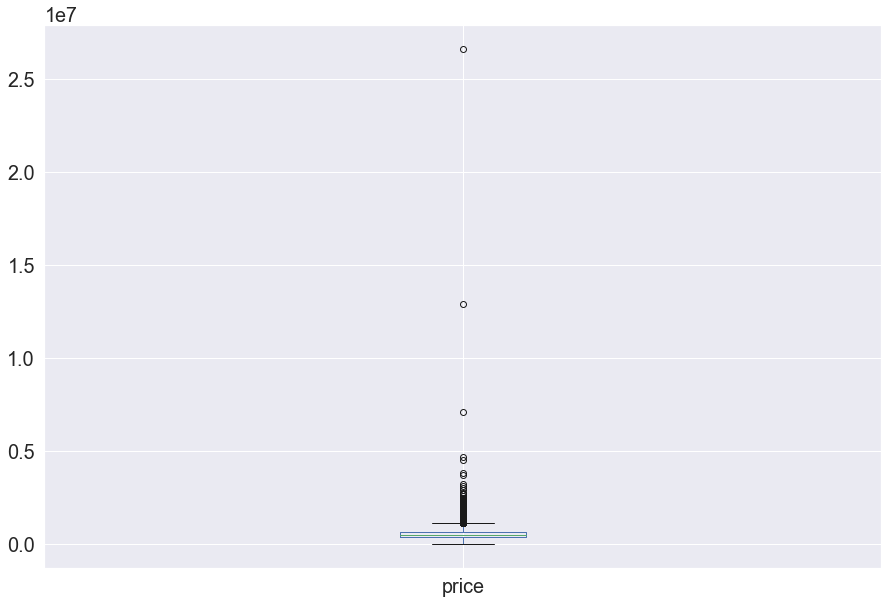

In [165]:
df.boxplot(column = 'price', figsize = (15,10))

# removing outliers

In [166]:
df3 = sorted(df['price'])

In [167]:
quantile1,quantile3 = np.percentile(df3,[25,75])


In [168]:
print(quantile1,quantile3)

339997.5 650000.0


In [169]:
iqr = quantile3 - quantile1

In [170]:
print(iqr)

310002.5


In [171]:
lower_bound = quantile1 - (1.5*iqr)
upper_bound = quantile3 + (1.5*iqr)

In [172]:
print(lower_bound,upper_bound)

-125006.25 1115003.75


In [173]:
# another method
outliers = []
def detect_outliers(data):
    
    thershold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > thershold:
            outliers.append(i)
    return outliers

In [174]:
df = df[df['price'] < 1115003.75] # removing the outliers

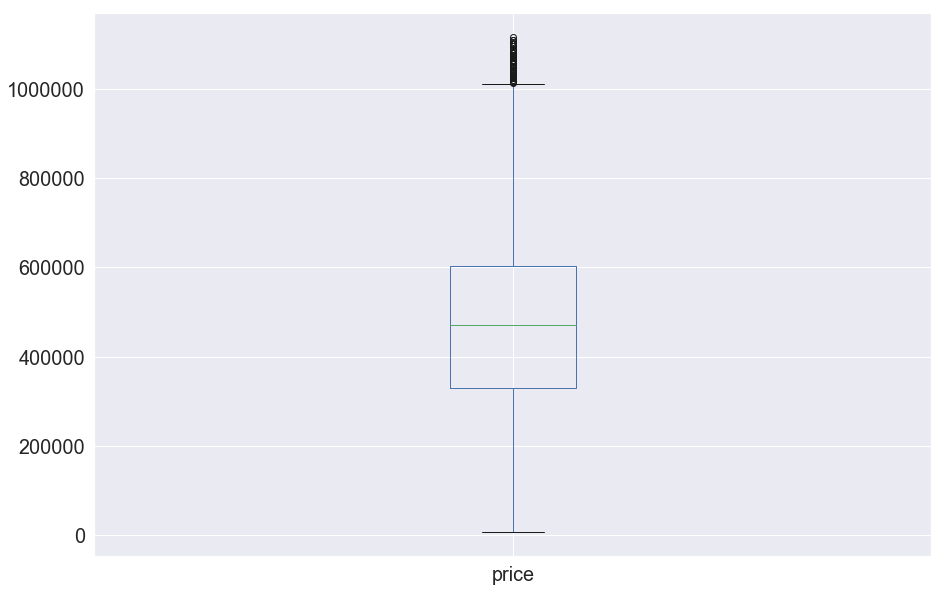

In [175]:
df.boxplot(column = 'price', figsize = (15,10))

In [176]:
df.head()

,area.sqft_above,area.sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,street,city,state,country,bathrooms,bedrooms,sqft_living,sqft_lot
0,1340,0,3,2014-05-02 00:00:00,1.5,313000.0,0,0,1955,2001,18810 Densmore Ave N,Shoreline,WA 98133,USA,1.50,3.0,1340,7912
2,1930,0,4,2014-05-02 00:00:00,1.0,342000.0,0,0,1966,2001,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2.00,3.0,1930,11947
3,1000,1000,4,2014-05-02 00:00:00,1.0,420000.0,0,0,1963,2001,857 170th Pl NE,Bellevue,WA 98008,USA,2.25,3.0,2000,8030
4,1140,800,4,2014-05-02 00:00:00,1.0,550000.0,0,0,1976,2001,9105 170th Ave NE,Redmond,WA 98052,USA,2.50,4.0,1940,10500
5,880,0,3,2014-05-02 00:00:00,1.0,490000.0,0,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,1.00,2.0,880,6380


# Univariate analysis

[]

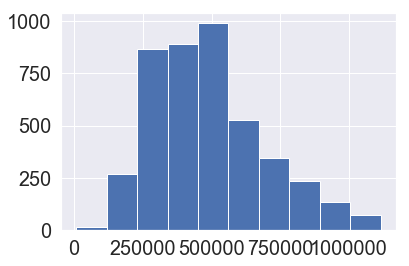

In [177]:
# Target variable
df['price'].hist()
plt.plot()

It is not normally distributed

# independent variables

In [178]:
df.describe()

,area.sqft_above,area.sqft_basement,condition,floors,price,view,waterfront,yr_built,yr_renovated,bathrooms,bedrooms,sqft_living,sqft_lot
count,4339.000000,4339.000000,4339.000000,4339.000000,4.339000e+03,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4.339000e+03
mean,1746.401014,283.859184,3.445494,1.494469,4.876181e+05,0.176308,0.004148,1970.827841,2000.727357,2.097949,3.354460,2030.002074,1.441232e+04
std,763.946547,422.316814,0.671123,0.537305,2.040707e+05,0.654474,0.064282,29.492239,4.299540,0.723482,0.883594,807.617460,3.562557e+04
min,370.000000,0.000000,1.000000,1.000000,7.800000e+03,0.000000,0.000000,1900.000000,1912.000000,0.000000,0.000000,370.000000,6.380000e+02
25%,1170.000000,0.000000,3.000000,1.000000,3.300000e+05,0.000000,0.000000,1951.000000,2001.000000,1.750000,3.000000,1435.000000,5.000000e+03
50%,1540.000000,0.000000,3.000000,1.500000,4.700000e+05,0.000000,0.000000,1975.000000,2001.000000,2.250000,3.000000,1920.000000,7.560000e+03
75%,2190.000000,565.000000,4.000000,2.000000,6.020000e+05,0.000000,0.000000,1996.000000,2001.000000,2.500000,4.000000,2510.000000,1.068750e+04
max,8020.000000,2300.000000,5.000000,3.500000,1.115000e+06,4.000000,1.000000,2014.000000,2014.000000,6.250000,9.000000,8020.000000,1.074218e+06


In [179]:
num_dataset = df.loc[:,['area.sqft_above','area.sqft_basement','bathrooms',
                        'bedrooms','sqft_living','sqft_lot','waterfront','condition','floors','view']]

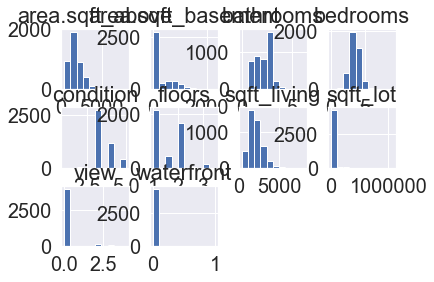

In [180]:
num_dataset.hist(layout = (3,4))
plt.show()

In [181]:
df['waterfront'].value_counts()

0    4321
1      18
Name: waterfront, dtype: int64

In [182]:
df['condition'].value_counts()
df['floors'].value_counts()
df['view'].value_counts()

0    4003
2     173
3      71
1      54
4      38
Name: view, dtype: int64

from above graph, we come to know that waterfront,condition,floors and viw are the discrete variables

In [183]:
df.head()

,area.sqft_above,area.sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,street,city,state,country,bathrooms,bedrooms,sqft_living,sqft_lot
0,1340,0,3,2014-05-02 00:00:00,1.5,313000.0,0,0,1955,2001,18810 Densmore Ave N,Shoreline,WA 98133,USA,1.50,3.0,1340,7912
2,1930,0,4,2014-05-02 00:00:00,1.0,342000.0,0,0,1966,2001,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2.00,3.0,1930,11947
3,1000,1000,4,2014-05-02 00:00:00,1.0,420000.0,0,0,1963,2001,857 170th Pl NE,Bellevue,WA 98008,USA,2.25,3.0,2000,8030
4,1140,800,4,2014-05-02 00:00:00,1.0,550000.0,0,0,1976,2001,9105 170th Ave NE,Redmond,WA 98052,USA,2.50,4.0,1940,10500
5,880,0,3,2014-05-02 00:00:00,1.0,490000.0,0,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,1.00,2.0,880,6380


In [184]:
df['yrs_to_renovate'] = df['yr_renovated'] - df['yr_built']

In [185]:
df.describe()

,area.sqft_above,area.sqft_basement,condition,floors,price,view,waterfront,yr_built,yr_renovated,bathrooms,bedrooms,sqft_living,sqft_lot,yrs_to_renovate
count,4339.000000,4339.000000,4339.000000,4339.000000,4.339000e+03,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4.339000e+03,4339.000000
mean,1746.401014,283.859184,3.445494,1.494469,4.876181e+05,0.176308,0.004148,1970.827841,2000.727357,2.097949,3.354460,2030.002074,1.441232e+04,29.899516
std,763.946547,422.316814,0.671123,0.537305,2.040707e+05,0.654474,0.064282,29.492239,4.299540,0.723482,0.883594,807.617460,3.562557e+04,29.478048
min,370.000000,0.000000,1.000000,1.000000,7.800000e+03,0.000000,0.000000,1900.000000,1912.000000,0.000000,0.000000,370.000000,6.380000e+02,-100.000000
25%,1170.000000,0.000000,3.000000,1.000000,3.300000e+05,0.000000,0.000000,1951.000000,2001.000000,1.750000,3.000000,1435.000000,5.000000e+03,5.000000
50%,1540.000000,0.000000,3.000000,1.500000,4.700000e+05,0.000000,0.000000,1975.000000,2001.000000,2.250000,3.000000,1920.000000,7.560000e+03,25.000000
75%,2190.000000,565.000000,4.000000,2.000000,6.020000e+05,0.000000,0.000000,1996.000000,2001.000000,2.500000,4.000000,2510.000000,1.068750e+04,49.500000
max,8020.000000,2300.000000,5.000000,3.500000,1.115000e+06,4.000000,1.000000,2014.000000,2014.000000,6.250000,9.000000,8020.000000,1.074218e+06,109.000000


In [186]:
# yrs_to_renovate has negative min value which is not possible hence checking for it.
df[df['yr_renovated']<df['yr_built']]

,area.sqft_above,area.sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,street,city,state,country,bathrooms,bedrooms,sqft_living,sqft_lot,yrs_to_renovate
22,1470,280,3,2014-05-02 00:00:00,2.5,626000.0,0,0,2005,2001,3140 Franklin Ave E,Seattle,WA 98102,USA,2.25,3.0,1750,1572,-4
31,2190,670,3,2014-05-02 00:00:00,2.0,499950.0,0,0,2004,2001,20120 137th Ave NE,Woodinville,WA 98072,USA,2.50,4.0,2860,3345,-3
33,2820,0,3,2014-05-02 00:00:00,2.0,625000.0,0,0,2014,2001,17052 4th Ave NE,Shoreline,WA 98155,USA,2.50,4.0,2820,8408,-13
57,3660,0,3,2014-05-02 00:00:00,2.0,785000.0,2,0,2006,2001,7425 Snowberry Ave SE,Snoqualmie,WA 98065,USA,3.25,5.0,3660,11995,-5
58,1040,280,3,2014-05-02 00:00:00,2.0,385000.0,0,0,2008,2001,3400 21st Ave W,Seattle,WA 98199,USA,3.25,3.0,1320,1327,-7
59,1280,350,3,2014-05-02 00:00:00,2.0,295000.0,0,0,2009,2001,5944-6082 Delridge Way SW,Seattle,WA 98106,USA,2.50,2.0,1630,1368,-8
60,3310,0,3,2014-05-02 00:00:00,2.0,555000.0,0,0,2012,2001,35229 SE Terrace St,Snoqualmie,WA 98065,USA,2.50,4.0,3310,6500,-11
61,2680,0,3,2014-05-02 00:00:00,2.0,459990.0,0,0,2013,2001,13800 453rd Ave SE,North Bend,WA 98045,USA,2.50,3.0,2680,5539,-12
62,1560,1170,3,2014-05-02 00:00:00,1.0,625000.0,0,0,2007,2001,9927 174th Ave SE,Renton,WA 98059,USA,3.25,4.0,2730,54014,-6
63,2540,0,3,2014-05-02 00:00:00,2.0,300000.0,0,0,2006,2001,29734 215th Terrace SE,Kent,WA 98042,USA,2.50,3.0,2540,5050,-5


In [187]:
# replacing those values with median
df['yr_built'] = np.where((df['yr_renovated']<df['yr_built']),1975,df.yr_built)

In [188]:
#df['yr_renovated'] = np.where((df['yr_renovated']<df['yr_built']),2001,df.yr_renovated)

In [189]:
# checking
df.describe()

,area.sqft_above,area.sqft_basement,condition,floors,price,view,waterfront,yr_built,yr_renovated,bathrooms,bedrooms,sqft_living,sqft_lot,yrs_to_renovate
count,4339.000000,4339.000000,4339.000000,4339.000000,4.339000e+03,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4.339000e+03,4339.000000
mean,1746.401014,283.859184,3.445494,1.494469,4.876181e+05,0.176308,0.004148,1964.563494,2000.727357,2.097949,3.354460,2030.002074,1.441232e+04,29.899516
std,763.946547,422.316814,0.671123,0.537305,2.040707e+05,0.654474,0.064282,23.943943,4.299540,0.723482,0.883594,807.617460,3.562557e+04,29.478048
min,370.000000,0.000000,1.000000,1.000000,7.800000e+03,0.000000,0.000000,1900.000000,1912.000000,0.000000,0.000000,370.000000,6.380000e+02,-100.000000
25%,1170.000000,0.000000,3.000000,1.000000,3.300000e+05,0.000000,0.000000,1951.000000,2001.000000,1.750000,3.000000,1435.000000,5.000000e+03,5.000000
50%,1540.000000,0.000000,3.000000,1.500000,4.700000e+05,0.000000,0.000000,1975.000000,2001.000000,2.250000,3.000000,1920.000000,7.560000e+03,25.000000
75%,2190.000000,565.000000,4.000000,2.000000,6.020000e+05,0.000000,0.000000,1979.000000,2001.000000,2.500000,4.000000,2510.000000,1.068750e+04,49.500000
max,8020.000000,2300.000000,5.000000,3.500000,1.115000e+06,4.000000,1.000000,2001.000000,2014.000000,6.250000,9.000000,8020.000000,1.074218e+06,109.000000


In [190]:
df[df['yr_renovated']<df['yr_built']]

,area.sqft_above,area.sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,street,city,state,country,bathrooms,bedrooms,sqft_living,sqft_lot,yrs_to_renovate
4340,1080,1080,3,2014-05-02 00:00:00,1.0,440000.0,0,0,1975,1913,12211 SE 65th St,Bellevue,WA 98006,USA,2.25,4.0,2160,8119,-53
4342,3206,0,3,2014-05-08 00:00:00,2.0,375000.0,0,0,1975,1912,25921-25929 35th Pl S,Kent,WA 98032,USA,2.25,6.0,3206,5793,-100
4345,3090,0,3,2014-05-22 00:00:00,2.0,850000.0,4,0,1975,1923,19117-19123 Richmond Beach Dr NW,Shoreline,WA 98177,USA,3.25,4.0,3090,6744,-90


In [191]:
df.drop(index=[4340,4342,4345],inplace= True)

In [192]:
df[df['yr_renovated']<df['yr_built']]

,area.sqft_above,area.sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,street,city,state,country,bathrooms,bedrooms,sqft_living,sqft_lot,yrs_to_renovate


In [193]:
df.describe()

,area.sqft_above,area.sqft_basement,condition,floors,price,view,waterfront,yr_built,yr_renovated,bathrooms,bedrooms,sqft_living,sqft_lot,yrs_to_renovate
count,4336.000000,4336.000000,4336.000000,4336.000000,4.336000e+03,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4.336000e+03,4336.000000
mean,1745.908210,283.806504,3.445803,1.494350,4.875715e+05,0.175507,0.004151,1964.556273,2000.785978,2.097613,3.353552,2029.456411,1.441753e+04,29.976245
std,763.549369,422.245813,0.671252,0.537329,2.040587e+05,0.652108,0.064304,23.950652,3.675643,0.723513,0.882876,807.536334,3.563734e+04,29.338656
min,370.000000,0.000000,1.000000,1.000000,7.800000e+03,0.000000,0.000000,1900.000000,1934.000000,0.000000,0.000000,370.000000,6.380000e+02,-13.000000
25%,1170.000000,0.000000,3.000000,1.000000,3.300000e+05,0.000000,0.000000,1951.000000,2001.000000,1.750000,3.000000,1430.000000,5.000000e+03,5.000000
50%,1540.000000,0.000000,3.000000,1.500000,4.700000e+05,0.000000,0.000000,1975.000000,2001.000000,2.250000,3.000000,1920.000000,7.561500e+03,25.000000
75%,2190.000000,562.500000,4.000000,2.000000,6.020000e+05,0.000000,0.000000,1979.000000,2001.000000,2.500000,4.000000,2510.000000,1.068975e+04,50.000000
max,8020.000000,2300.000000,5.000000,3.500000,1.115000e+06,4.000000,1.000000,2001.000000,2014.000000,6.250000,9.000000,8020.000000,1.074218e+06,109.000000


In [194]:
df['yrs_to_renovate'].unique()  # it also contains few negative values,hence we will remove those

array([ 46,  35,  38,  25,  56,  12,  16,  53,  21,  36,  45,   4,  14,
        18,  78,  47,  -4,  10,  42,  81,  22,  50,  34,  -3, -13,   6,
        57,   9,  44,  23,  27,  51,  11,  52,  33,  24,   5,   0,   1,
        72,  -5,  -7,  -8, -11, -12,  -6,  15,  28,  13, 101,  26,  29,
        41,  -2,   3,  59,  93,  43,  62,  89,  40,  30,  77,  99,  39,
        48,   7,  71,  73,  17,  -9,  54,  70,  63,  61,  49,  64,   2,
        37,  75,  19, 108,  98,  58,   8,  55,  97,  20,  84,  80, -10,
        -1,  88,  91,  96,  32,  76,  83,  60,  67,  86,  95,  79,  65,
        90,  74,  31,  92,  69,  82, 103, 100,  94,  68, 102,  85,  66,
       104,  87, 109], dtype=int64)

In [195]:
df =df[df['yrs_to_renovate']> 0] # removing

In [196]:
# yrs_built and renovated are categorical variables, convering those into catogorical
df['yr_built'] = df['yr_built'].astype('category')
df['yr_renovated'] = df['yr_renovated'].astype('category')

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3438 entries, 0 to 4600
Data columns (total 19 columns):
area.sqft_above       3438 non-null int64
area.sqft_basement    3438 non-null int64
condition             3438 non-null int64
date                  3438 non-null object
floors                3438 non-null float64
price                 3438 non-null float64
view                  3438 non-null int64
waterfront            3438 non-null int64
yr_built              3438 non-null category
yr_renovated          3438 non-null category
street                3438 non-null object
city                  3438 non-null object
state                 3438 non-null object
country               3438 non-null object
bathrooms             3438 non-null float64
bedrooms              3438 non-null float64
sqft_living           3438 non-null int64
sqft_lot              3438 non-null int64
yrs_to_renovate       3438 non-null int64
dtypes: category(2), float64(4), int64(8), object(5)
memory usage: 498.9+ KB

# Feature Engineering

In [198]:
df.head()

,area.sqft_above,area.sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,street,city,state,country,bathrooms,bedrooms,sqft_living,sqft_lot,yrs_to_renovate
0,1340,0,3,2014-05-02 00:00:00,1.5,313000.0,0,0,1955,2001,18810 Densmore Ave N,Shoreline,WA 98133,USA,1.50,3.0,1340,7912,46
2,1930,0,4,2014-05-02 00:00:00,1.0,342000.0,0,0,1966,2001,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2.00,3.0,1930,11947,35
3,1000,1000,4,2014-05-02 00:00:00,1.0,420000.0,0,0,1963,2001,857 170th Pl NE,Bellevue,WA 98008,USA,2.25,3.0,2000,8030,38
4,1140,800,4,2014-05-02 00:00:00,1.0,550000.0,0,0,1976,2001,9105 170th Ave NE,Redmond,WA 98052,USA,2.50,4.0,1940,10500,25
5,880,0,3,2014-05-02 00:00:00,1.0,490000.0,0,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,1.00,2.0,880,6380,56


In [199]:
# droping the columns street and country and date since we do not ahve enough info. on date column
df.drop(columns = ['street','country','date'],inplace =True)

In [200]:
df.head() 

,area.sqft_above,area.sqft_basement,condition,floors,price,view,waterfront,yr_built,yr_renovated,city,state,bathrooms,bedrooms,sqft_living,sqft_lot,yrs_to_renovate
0,1340,0,3,1.5,313000.0,0,0,1955,2001,Shoreline,WA 98133,1.50,3.0,1340,7912,46
2,1930,0,4,1.0,342000.0,0,0,1966,2001,Kent,WA 98042,2.00,3.0,1930,11947,35
3,1000,1000,4,1.0,420000.0,0,0,1963,2001,Bellevue,WA 98008,2.25,3.0,2000,8030,38
4,1140,800,4,1.0,550000.0,0,0,1976,2001,Redmond,WA 98052,2.50,4.0,1940,10500,25
5,880,0,3,1.0,490000.0,0,0,1938,1994,Seattle,WA 98115,1.00,2.0,880,6380,56


In [201]:
# splitting state column since satte is same for all records hence only pincode matters
df['state_list'] = df['state'].str.split(' ')
df['pincode1'] =df['state_list'].apply(lambda col:col[0])
df['pincode0'] =df['state_list'].apply(lambda col:col[1])
df['pincode'] =df['state_list'].apply(lambda col:col[2])

In [202]:
df.drop(columns =['state_list','pincode1','pincode0'],inplace=True)

In [203]:
df.head()

,area.sqft_above,area.sqft_basement,condition,floors,price,view,waterfront,yr_built,yr_renovated,city,state,bathrooms,bedrooms,sqft_living,sqft_lot,yrs_to_renovate,pincode
0,1340,0,3,1.5,313000.0,0,0,1955,2001,Shoreline,WA 98133,1.50,3.0,1340,7912,46,98133
2,1930,0,4,1.0,342000.0,0,0,1966,2001,Kent,WA 98042,2.00,3.0,1930,11947,35,98042
3,1000,1000,4,1.0,420000.0,0,0,1963,2001,Bellevue,WA 98008,2.25,3.0,2000,8030,38,98008
4,1140,800,4,1.0,550000.0,0,0,1976,2001,Redmond,WA 98052,2.50,4.0,1940,10500,25,98052
5,880,0,3,1.0,490000.0,0,0,1938,1994,Seattle,WA 98115,1.00,2.0,880,6380,56,98115


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3438 entries, 0 to 4600
Data columns (total 17 columns):
area.sqft_above       3438 non-null int64
area.sqft_basement    3438 non-null int64
condition             3438 non-null int64
floors                3438 non-null float64
price                 3438 non-null float64
view                  3438 non-null int64
waterfront            3438 non-null int64
yr_built              3438 non-null category
yr_renovated          3438 non-null category
city                  3438 non-null object
state                 3438 non-null object
bathrooms             3438 non-null float64
bedrooms              3438 non-null float64
sqft_living           3438 non-null int64
sqft_lot              3438 non-null int64
yrs_to_renovate       3438 non-null int64
pincode               3438 non-null object
dtypes: category(2), float64(4), int64(8), object(3)
memory usage: 445.2+ KB


In [205]:
df.drop(columns =['state'],inplace=True)

In [206]:
df.head()

,area.sqft_above,area.sqft_basement,condition,floors,price,view,waterfront,yr_built,yr_renovated,city,bathrooms,bedrooms,sqft_living,sqft_lot,yrs_to_renovate,pincode
0,1340,0,3,1.5,313000.0,0,0,1955,2001,Shoreline,1.50,3.0,1340,7912,46,98133
2,1930,0,4,1.0,342000.0,0,0,1966,2001,Kent,2.00,3.0,1930,11947,35,98042
3,1000,1000,4,1.0,420000.0,0,0,1963,2001,Bellevue,2.25,3.0,2000,8030,38,98008
4,1140,800,4,1.0,550000.0,0,0,1976,2001,Redmond,2.50,4.0,1940,10500,25,98052
5,880,0,3,1.0,490000.0,0,0,1938,1994,Seattle,1.00,2.0,880,6380,56,98115


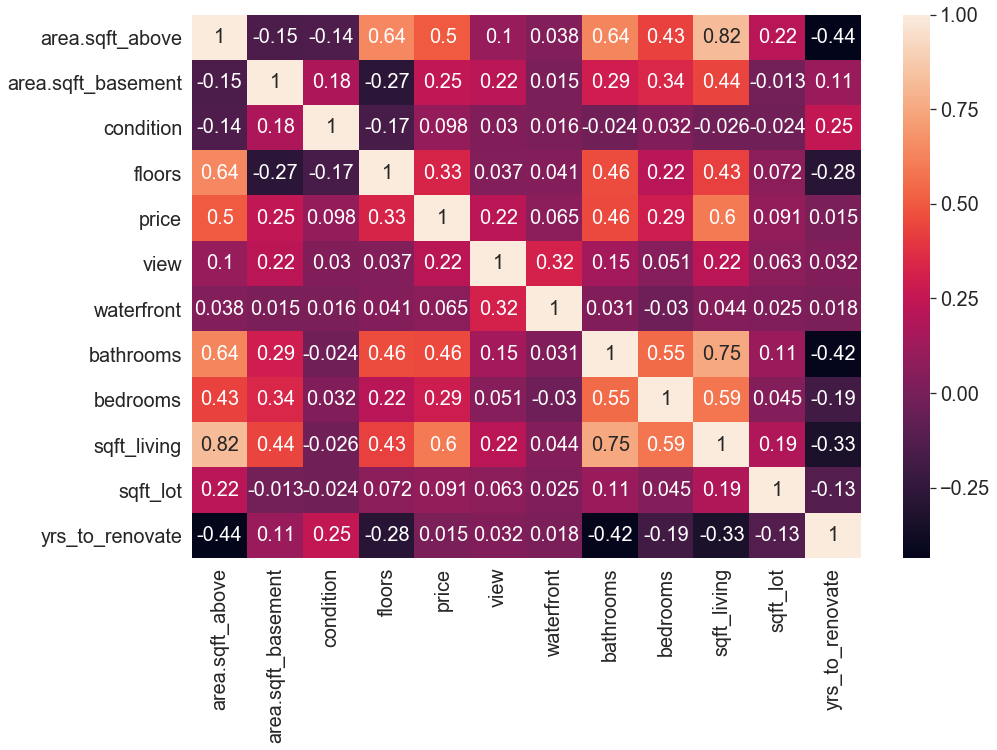

In [207]:
corrMatrix = df.corr()
import seaborn as sn
plt.subplots(figsize=(15,10))
sn.heatmap(corrMatrix, annot =True,annot_kws={"size": 20})
sn.set(font_scale= 1.8)


from  above matrix, we get that sqft_living and area.sqftabove are highly correlated, hence we will only consider only one of the variables. Variables yr_to renovate,sqft_lot,waterfront, condition are loosely correlated to price hence we will drop them.

In [208]:
df.columns

Index(['area.sqft_above', 'area.sqft_basement', 'condition', 'floors', 'price',
       'view', 'waterfront', 'yr_built', 'yr_renovated', 'city', 'bathrooms',
       'bedrooms', 'sqft_living', 'sqft_lot', 'yrs_to_renovate', 'pincode'],
      dtype='object')

In [209]:
df.drop(columns = ['area.sqft_above','yrs_to_renovate','sqft_lot','waterfront','condition'],axis = 1,inplace =True)

In [210]:
#removing city variable as well
df.drop(columns = ['city'],axis = 1,inplace =True)

In [211]:
df.head()

,area.sqft_basement,floors,price,view,yr_built,yr_renovated,bathrooms,bedrooms,sqft_living,pincode
0,0,1.5,313000.0,0,1955,2001,1.50,3.0,1340,98133
2,0,1.0,342000.0,0,1966,2001,2.00,3.0,1930,98042
3,1000,1.0,420000.0,0,1963,2001,2.25,3.0,2000,98008
4,800,1.0,550000.0,0,1976,2001,2.50,4.0,1940,98052
5,0,1.0,490000.0,0,1938,1994,1.00,2.0,880,98115


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3438 entries, 0 to 4600
Data columns (total 10 columns):
area.sqft_basement    3438 non-null int64
floors                3438 non-null float64
price                 3438 non-null float64
view                  3438 non-null int64
yr_built              3438 non-null category
yr_renovated          3438 non-null category
bathrooms             3438 non-null float64
bedrooms              3438 non-null float64
sqft_living           3438 non-null int64
pincode               3438 non-null object
dtypes: category(2), float64(4), int64(3), object(1)
memory usage: 257.2+ KB


In [213]:
df['pincode']= df['pincode'].astype('category')

In [214]:
# transforming area.sqft_basement,bathrooms,sqft_livinq into normal distribustion

df['bathrooms'] = np.log(1 + df['bathrooms'])
df['sqft_living'] = np.log(1 + df['sqft_living'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A06E03C50>]],
      dtype=object)

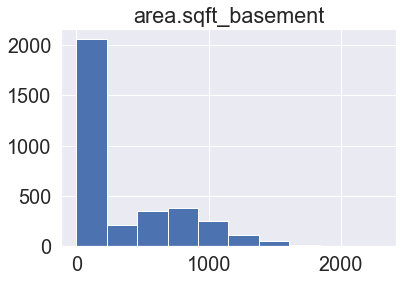

In [215]:
df.hist(column = 'area.sqft_basement')

In [216]:
df['area.sqft_basement'].value_counts().head()

0      1987
500      51
600      45
800      41
700      35
Name: area.sqft_basement, dtype: int64

we need to remove 0's in this variable
checking for other variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A093DAF28>]],
      dtype=object)

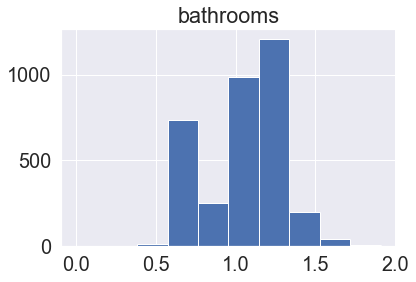

In [217]:
df.hist(column = 'bathrooms') 

above variable seems ok hence no need to make changes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A09257208>]],
      dtype=object)

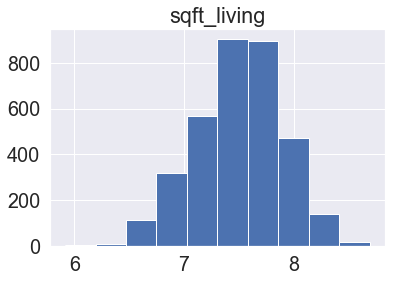

In [218]:
df.hist(column = 'sqft_living')  # sqft_living varibale also seems ok

In [219]:

df.head()

,area.sqft_basement,floors,price,view,yr_built,yr_renovated,bathrooms,bedrooms,sqft_living,pincode
0,0,1.5,313000.0,0,1955,2001,0.916291,3.0,7.201171,98133
2,0,1.0,342000.0,0,1966,2001,1.098612,3.0,7.565793,98042
3,1000,1.0,420000.0,0,1963,2001,1.178655,3.0,7.601402,98008
4,800,1.0,550000.0,0,1976,2001,1.252763,4.0,7.570959,98052
5,0,1.0,490000.0,0,1938,1994,0.693147,2.0,6.781058,98115


In [220]:
df['pincode'].unique()

[98133, 98042, 98008, 98052, 98115, ..., 98068, 98047, 98050, 98354, 98039]
Length: 77
Categories (77, object): [98133, 98042, 98008, 98052, ..., 98047, 98050, 98354, 98039]

In [221]:
df['yr_built'].unique()

[1955, 1966, 1963, 1976, 1938, ..., 1915, 1935, 1933, 1914, 1934]
Length: 101
Categories (101, int64): [1955, 1966, 1963, 1976, ..., 1935, 1933, 1914, 1934]

In [222]:
df['yr_renovated'].unique()

[2001, 1994, 1954, 2011, 1998, ..., 1968, 1995, 1974, 1977, 1975]
Length: 53
Categories (53, int64): [2001, 1994, 1954, 2011, ..., 1995, 1974, 1977, 1975]

In [252]:
# removing categorical variables as these are not significant

In [242]:
feature_model = ['area.sqft_basement','floors','view','bathrooms','bedrooms','sqft_living']
df_x = df[feature_model]

In [243]:
df_y = df['price']

In [244]:
from sklearn.model_selection import train_test_split

In [245]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size = 0.3,random_state =11)

In [246]:
x_train.shape

(2406, 6)

In [247]:
x_test.shape

(1032, 6)

In [248]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [249]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [250]:
y_predict = model.predict(x_test)

In [251]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.35089082849218123